In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('liver_patient.csv')
data.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data=data.dropna()

In [4]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
Age                           579 non-null int64
Gender                        579 non-null object
Total_Bilirubin               579 non-null float64
Direct_Bilirubin              579 non-null float64
Alkaline_Phosphotase          579 non-null int64
Alamine_Aminotransferase      579 non-null int64
Aspartate_Aminotransferase    579 non-null int64
Total_Protiens                579 non-null float64
Albumin                       579 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       579 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [6]:
data = data.rename(columns = {"Dataset": "With Liver Ailment"}) 


In [7]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,With Liver Ailment
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


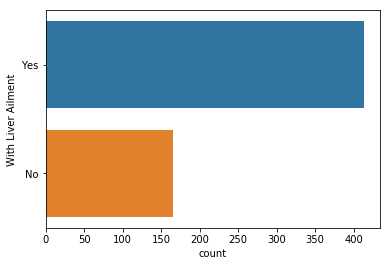

In [8]:

df_liver=data.replace([1, 2], ['Yes', 'No'])
sns.countplot(y=df_liver['With Liver Ailment'])

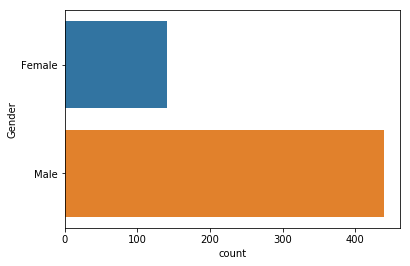

In [9]:
sns.countplot(y=df_liver['Gender'])


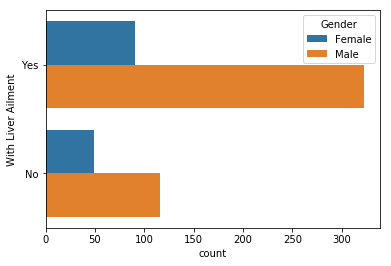

In [10]:
sns.countplot(y=df_liver['With Liver Ailment'], hue=df_liver['Gender'])

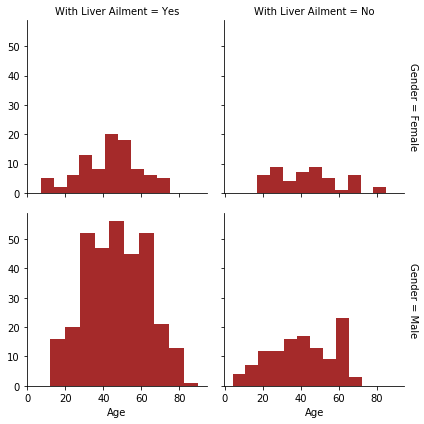

In [11]:
g = sns.FacetGrid(df_liver, col="With Liver Ailment", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="brown")



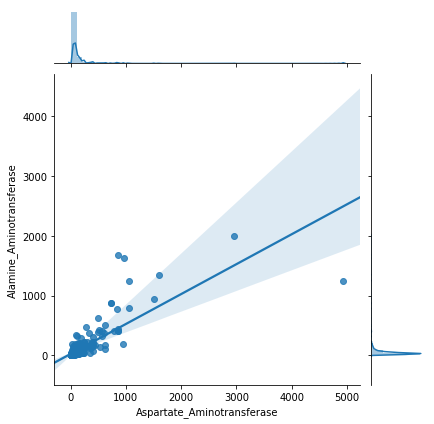

In [12]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=df_liver, kind="reg")

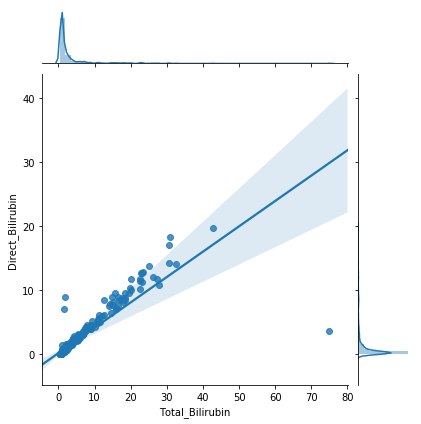

In [13]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=data, kind="reg")

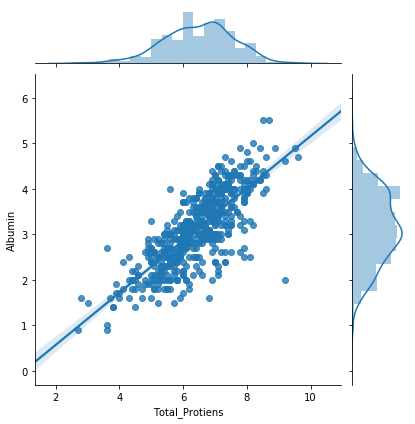

In [14]:
sns.jointplot("Total_Protiens", "Albumin", data=data, kind="reg")

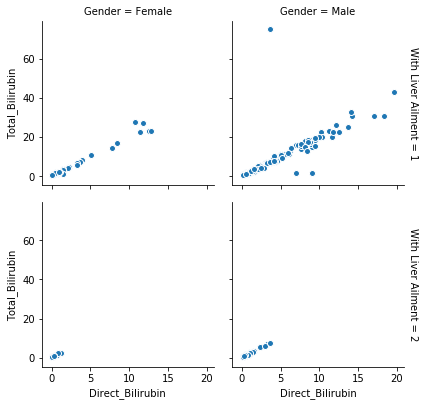

In [15]:
g = sns.FacetGrid(data, col="Gender", row="With Liver Ailment", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)


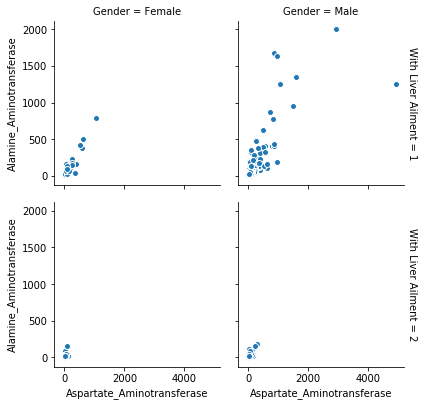

In [16]:
g = sns.FacetGrid(data, col="Gender", row="With Liver Ailment", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase", edgecolor="w")
plt.subplots_adjust(top=0.9)


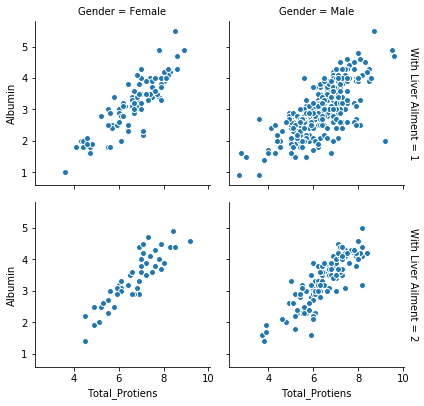

In [17]:
g = sns.FacetGrid(data, col="Gender", row="With Liver Ailment", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin", edgecolor="w")
plt.subplots_adjust(top=0.9)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
Age                           579 non-null int64
Gender                        579 non-null object
Total_Bilirubin               579 non-null float64
Direct_Bilirubin              579 non-null float64
Alkaline_Phosphotase          579 non-null int64
Alamine_Aminotransferase      579 non-null int64
Aspartate_Aminotransferase    579 non-null int64
Total_Protiens                579 non-null float64
Albumin                       579 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
With Liver Ailment            579 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 74.3+ KB


In [19]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,With Liver Ailment
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [20]:
data.Gender = data.Gender.replace({"Female": "1", "Male": "2"})

In [21]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,With Liver Ailment
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,2,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,2,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,2,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,2,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [22]:
column=["With Liver Ailment"]
x=data.drop(column,axis=1)
y=data["With Liver Ailment"]

In [23]:
x.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,2,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,2,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,2,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,2,3.9,2.0,195,27,59,7.3,2.4,0.40


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: With Liver Ailment, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=7)

In [26]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=2)
dtree=dtree.fit(x,y)


In [27]:
res=dtree.predict([[67,1,6,8,600,69,89,7,9,0.9]])

In [28]:
val=res[0]

In [29]:
val

1

In [30]:
dtree.score(x,y)

0.9378238341968912

# Actual Computation

In [88]:
age=19 #the persons age

In [89]:
gen=2 #female =1, male=2

In [90]:
tb=11 #Total_Bilirubin

In [91]:
db=2 #Direct_Bilirubin

In [92]:
ap=100 #Alkaline_Phosphotase

In [93]:
aa=59 #Alamine_Aminotransferase

In [94]:
aat=60 #Aspartate_Aminotransferase

In [95]:
tp=4 #Total_Protiens

In [96]:
ab=2 #Albumin

In [97]:
agr=0.5 #Albumin_and_Globulin_Ratio

In [98]:
res=dtree.predict([[age,gen,tb,db,ap,aa,aat,tp,ab,agr]])

In [99]:
val=res[0]

In [100]:
val

1

In [101]:
if (val==1):
    print('Based on chemical compounds(bilrubin,albumin,protiens,alkaline phosphatase etc )')
    print('You have high risk of liver ailments')
    print('You must get proper treatment')
    print('--------------------------------------------')
    print('Excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs')
    print('Highly contribute to liver ailments, if you have been taking any of them, please stop')
    print('--------------------------------------------')
    
    print('===BILIRUBIN===')
    if (tb<=1.4 and db<=0.4):
        print('Normal Bilirubin Levels')
        print('It is normal to have some bilirubin in the blood.')
    else:
        print('Your Bilirubin Levels are higher than above')
        print('High levels of bilirubin can cause many many liver related problembs')
        print('These may be the problembs')
        print('Jaundice, Scarring of the liver (cirrhosis)')
        print('Swollen and inflamed liver (hepatitis)')
        print('Other liver disease')
    
    print('                            ')
    print('===Alkaline_Phosphotase===')
    if (ap<=200):
        print('Alkaline phosphatase (ALP) is an enzyme in a persons blood that helps break down proteins. ')
        print('Your levels are normal')
    else:
        print("Your levels are high")
        print('Slightly irregular ALP levels are usually no cause for concern.')
        print('However, severely abnormal levels can signify a severe underlying medical condition')
        print('Typically one relating to the liver, bones, or gallbladder.')
    
    print('  ')
    print("Total Proteins*************")
    if(tp>=6 and tp<=9):
        print('Your total protein levels are normal')
    else:
        print('Your total protein levels are not okay')
    
 
if (val==0):
    print('Based on chemical compounds(bilrubin,albumin,protiens,alkaline phosphatase etc ')
    print('You have low risk of liver ailments')
    print('===BILIRUBIN===')
    if (tb<=1.4 and db<=0.4):
        print('Normal Bilirubin Levels')
        print('It is normal to have some bilirubin in the blood.')
    else:
        print('Your Bilirubin Levels are higher than above')
        print('High levels of bilirubin can cause many many liver related problembs')
        print('These may be the problembs')
        print('Jaundice, Scarring of the liver (cirrhosis)')
        print('Swollen and inflamed liver (hepatitis)')
        print('Other liver disease')
    
    print('                            ')
    print('===Alkaline_Phosphotase===')
    if (ap<=200):
        print('Alkaline phosphatase (ALP) is an enzyme in a persons blood that helps break down proteins. ')
        print('Your levels are normal')
    else:
        print("Your levels are high")
        print('Slightly irregular ALP levels are usually no cause for concern.')
        print('However, severely abnormal levels can signify a severe underlying medical condition')
        print('Typically one relating to the liver, bones, or gallbladder.')
    
    print('  ')
    print("Total Proteins*************")
    if(tp>=6 and tp<=9):
        print('Your total protein levels are normal')
    else:
        print('Your total protein levels are not okay')
    

Based on chemical compounds(bilrubin,albumin,protiens,alkaline phosphatase etc )
You have high risk of liver ailments
You must get proper treatment
--------------------------------------------
Excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs
Highly contribute to liver ailments, if you have been taking any of them, please stop
--------------------------------------------
===BILIRUBIN===
Your Bilirubin Levels are higher than above
High levels of bilirubin can cause many many liver related problembs
These may be the problembs
Jaundice, Scarring of the liver (cirrhosis)
Swollen and inflamed liver (hepatitis)
Other liver disease
                            
===Alkaline_Phosphotase===
Alkaline phosphatase (ALP) is an enzyme in a persons blood that helps break down proteins. 
Your levels are normal
  
Total Proteins*************
Your total protein levels are not okay
